# Progetto Python


In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'/Users/gianpaolocoppola/Documents/GitHub'

In [4]:
#carichiamo i dati degli annunci
df_listings = pd.read_csv('/Users/gianpaolocoppola/Documents/GitHub/listings-3.csv')

In [5]:
print(df_listings)

                       id                                      listing_url  \
0                 5678774             https://www.airbnb.com/rooms/5678774   
1                 5625937             https://www.airbnb.com/rooms/5625937   
2                 6139798             https://www.airbnb.com/rooms/6139798   
3                 7479570             https://www.airbnb.com/rooms/7479570   
4                 8438872             https://www.airbnb.com/rooms/8438872   
...                   ...                                              ...   
20365  637425034363201358  https://www.airbnb.com/rooms/637425034363201358   
20366            40817739            https://www.airbnb.com/rooms/40817739   
20367  592550481216316403  https://www.airbnb.com/rooms/592550481216316403   
20368            10150665            https://www.airbnb.com/rooms/10150665   
20369            22007360            https://www.airbnb.com/rooms/22007360   

            scrape_id last_scraped           source  \
0      2

In [55]:
df_listings.dtypes

id                                                int64
name                                             object
description                                      object
neighborhood_overview                            object
host_id                                           int64
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                   

In [7]:
#carichiamo i dati delle recensioni
df_reviews = pd.read_csv('/Users/gianpaolocoppola/Documents/GitHub/reviews-3.csv')

In [8]:
print(df_reviews)

                listing_id                  id        date  reviewer_id  \
0                     6400               36772  2010-04-19        94463   
1                     6400              227727  2011-04-16       415910   
2                     6400             1162608  2012-04-22       415910   
3                     6400            11670681  2014-04-11      8464658   
4                     6400            11780336  2014-04-14      5427294   
...                    ...                 ...         ...          ...   
611799  838184897759433339  847722747234842814  2023-03-15     46351960   
611800  838188511130316229  846976029055875390  2023-03-14    205576010   
611801  838266422550245358  840401357243960792  2023-03-05    424155005   
611802  838266422550245358  843313780914723751  2023-03-09    388259970   
611803  838266422550245358  844755620276373651  2023-03-11    186023564   

       reviewer_name                                           comments  
0               Hyun  I h

In [9]:
print(df_reviews.dtypes)

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


In [10]:
# Calcola il numero di recensioni per ogni annuncio, può essere una buona proxy per il successo di un annuncio
df_nreviews = df_reviews.groupby('listing_id').size().reset_index(name='n_reviews')

In [11]:
print(df_nreviews)

               listing_id  n_reviews
0                    6400         12
1                   23986         22
2                   37256         34
3                   40470         41
4                   46536         30
...                   ...        ...
16040  845491730885978098          1
16041  845609167593520388          1
16042  845639972003959156          1
16043  846130517363365733          1
16044  846361153910571260          1

[16045 rows x 2 columns]


In [12]:
df_nreviews2 = df_nreviews.rename(columns={'listing_id': 'id'})

In [13]:
print(df_nreviews2)

                       id  n_reviews
0                    6400         12
1                   23986         22
2                   37256         34
3                   40470         41
4                   46536         30
...                   ...        ...
16040  845491730885978098          1
16041  845609167593520388          1
16042  845639972003959156          1
16043  846130517363365733          1
16044  846361153910571260          1

[16045 rows x 2 columns]


In [14]:
# Combina i dati degli annunci con il numero di prenotazioni
df_listings = pd.merge(df_listings, df_nreviews2, on='id', how='left')

In [15]:
def convert_to_int(value):
    try:
        result = int(value)
    except (ValueError, TypeError):
        result = 0
    return result

In [16]:
df_listings['n_reviews'] = df_listings['n_reviews'].apply(convert_to_int)

In [17]:
df_listings['n_reviews'].dtypes

dtype('int64')

In [18]:
print(df_listings['n_reviews'])

0          3
1        226
2          0
3          0
4          0
        ... 
20365     11
20366     35
20367      2
20368     46
20369     51
Name: n_reviews, Length: 20370, dtype: int64


In [19]:
df_listings['price'].dtypes

dtype('O')

In [20]:
df_listings['price'] = df_listings['price'].replace({'\$': ''}, regex=True).astype(str)

In [21]:
df_listings['price'] = df_listings['price'].str.replace(',', '').astype(float)

In [22]:
df_listings['price'].dtypes

dtype('float64')

In [23]:
df_listings['description'] = df_listings['description'].astype(str)

In [24]:
df_listings['len_description'] = df_listings['description'].apply(lambda x : len(str(x)))

In [56]:
df_listings[['host_location', 'id', 'latitude', 'longitude']]

,host_location,id,latitude,longitude
0,"Milan, Italy",5678774,45.452340,9.174740
2,NaN,6139798,45.512520,9.130460
3,"Rome, Italy",7479570,45.456200,9.201310
4,"Milan, Italy",8438872,45.495470,9.207160
5,"Milan, Italy",10609449,45.448450,9.181160
...,...,...,...,...
18614,"Milan, Italy",833934291490970238,45.456288,9.177388
18615,"Milan, Italy",637425034363201358,45.457314,9.180191
18616,"Milan, Italy",40817739,45.458340,9.179450
18617,"Milan, Italy",592550481216316403,45.492150,9.193410


In [26]:
#eliminiamo le colonne di cui non ci serviremo
df_listings = df_listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url','host_name','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated' ], axis=1)

In [27]:
df_listings

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_reviews,len_description
0,5678774,Central Appartment,"A very nice flat in the city center, really go...",NaN,10850820,2013-12-27,"Milan, Italy",NaN,NaN,NaN,...,4.00,NaN,f,1,1,0,0,0.04,3,86
1,5625937,Fancy apt in historical building in Duomo Area...,T,NaN,138138,2010-06-04,"Milan, Italy",Massimo\n,within an hour,100%,...,4.39,NaN,t,18,18,0,0,2.33,226,1
2,6139798,Affitto casa per Expo,Affittasi casa periodo estivo. Vicinissima a E...,"Il quartiere dispone di tutti i servizi, compr...",31850692,2015-04-24,NaN,NaN,NaN,NaN,...,NaN,NaN,t,1,1,0,0,NaN,0,250
3,7479570,Central Air-Conditioned Apartment,Fully equipped house in the historical center ...,NaN,7791230,2013-07-29,"Rome, Italy",Appassionata user di Airb&b dal 2008,NaN,NaN,...,NaN,NaN,f,1,1,0,0,NaN,0,161
4,8438872,Bedroom for the weekend,Very close to the Central Train Station and me...,NaN,23961606,2014-11-20,"Milan, Italy",NaN,NaN,NaN,...,NaN,NaN,f,1,0,1,0,NaN,0,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,637425034363201358,"Appartamento centro storico, navigli, ticinese.","In pieno centro storico, nel caratteristico e ...","Una tra le più caratteristiche zone di Milano,...",461479164,2022-05-29,"Milan, Italy",NaN,within an hour,100%,...,4.91,015146-CNI-05119,f,1,1,0,0,2.92,11,1000
20366,40817739,Nuvola Suite - 900mt from Duomo Square,Fornasetti Suite is a lovely studio apartment ...,NaN,5053160,2013-02-11,"Milan, Italy","Hi! I'm Laura, I'm Milanese and I love this ci...",within an hour,100%,...,4.69,015146-CIM-02972,t,35,35,0,0,0.90,35,876
20367,592550481216316403,Abbadesse - Abbadesse,Spacious two bedroom two bathroom apartment of...,NaN,63191555,2016-03-16,"Milan, Italy",Beautiful urban apartments around Italy.\nWe a...,within an hour,100%,...,3.00,015146-CIM-00172,t,76,76,0,0,0.30,2,1000
20368,10150665,"SWEET HOME SAN LORENZO, 2 BDR, 2 BTH, CITY CENTER",The house is located in the historical CENTER ...,MILAN SWEET HOME SAN LORENZO is located in the...,2718914,2012-06-23,NaN,"I love traveling , experiencing always new thi...",within an hour,100%,...,4.64,015146-CIM-00661,t,26,26,0,0,0.52,46,1000


In [28]:
import matplotlib.pyplot as plt

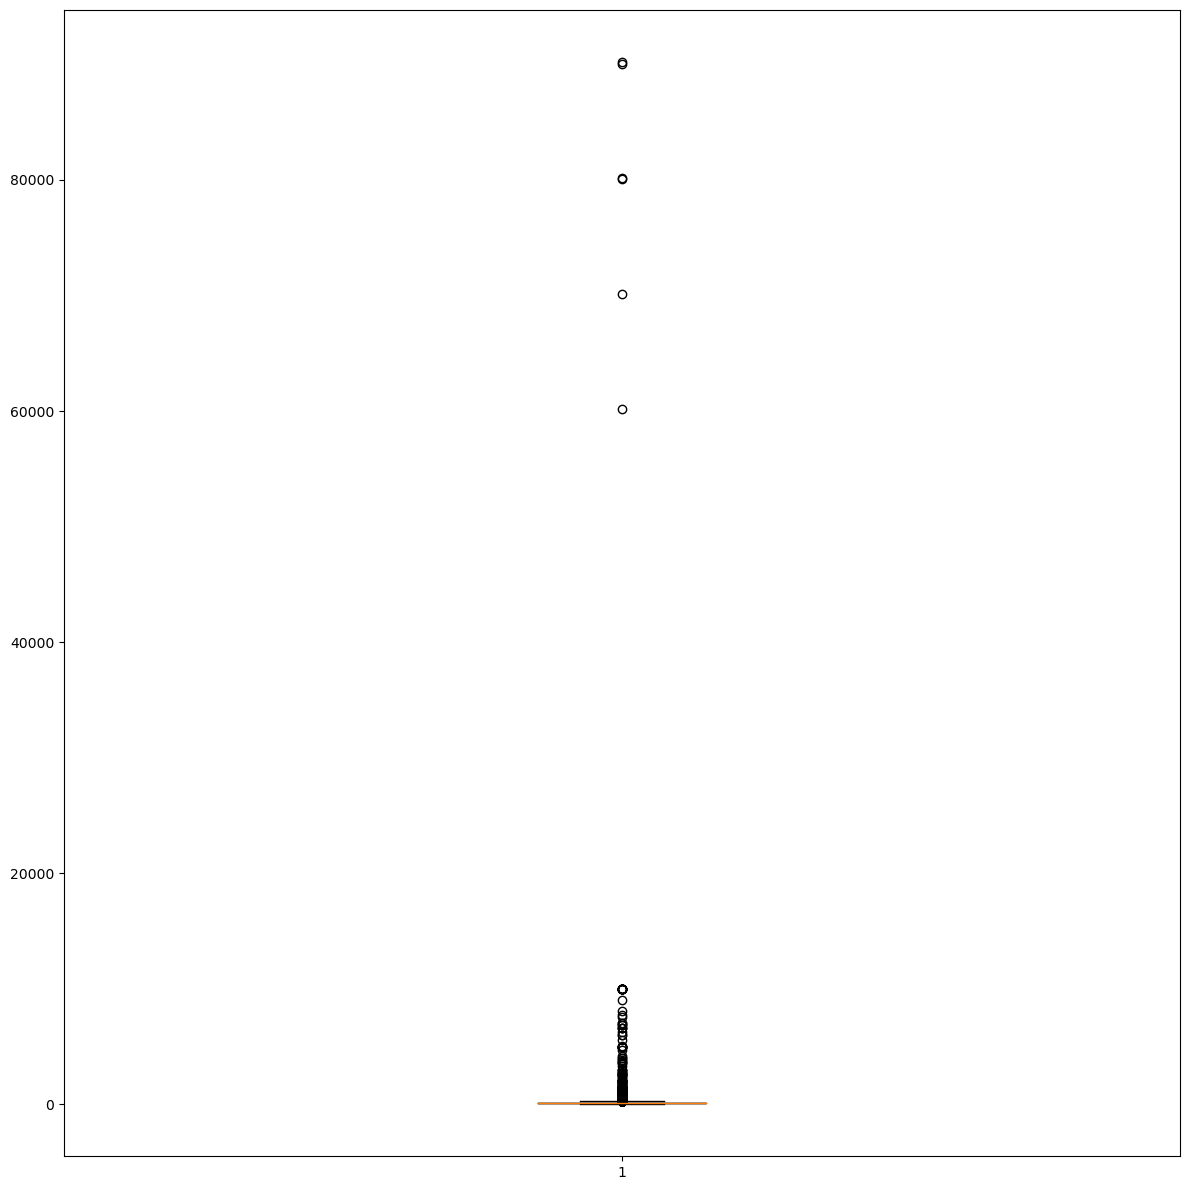

In [29]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_listings['price'])
plt.tight_layout()
plt.show()

In [30]:
from scipy import stats

In [31]:
Q1 = df_listings['price'].quantile(0.25)
Q3 = df_listings['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_listings = df_listings[(df_listings['price'] >= lower_bound) & (df_listings['price'] <= upper_bound)]


In [32]:
df_listings

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_reviews,len_description
0,5678774,Central Appartment,"A very nice flat in the city center, really go...",NaN,10850820,2013-12-27,"Milan, Italy",NaN,NaN,NaN,...,4.00,NaN,f,1,1,0,0,0.04,3,86
1,5625937,Fancy apt in historical building in Duomo Area...,T,NaN,138138,2010-06-04,"Milan, Italy",Massimo\n,within an hour,100%,...,4.39,NaN,t,18,18,0,0,2.33,226,1
2,6139798,Affitto casa per Expo,Affittasi casa periodo estivo. Vicinissima a E...,"Il quartiere dispone di tutti i servizi, compr...",31850692,2015-04-24,NaN,NaN,NaN,NaN,...,NaN,NaN,t,1,1,0,0,NaN,0,250
3,7479570,Central Air-Conditioned Apartment,Fully equipped house in the historical center ...,NaN,7791230,2013-07-29,"Rome, Italy",Appassionata user di Airb&b dal 2008,NaN,NaN,...,NaN,NaN,f,1,1,0,0,NaN,0,161
4,8438872,Bedroom for the weekend,Very close to the Central Train Station and me...,NaN,23961606,2014-11-20,"Milan, Italy",NaN,NaN,NaN,...,NaN,NaN,f,1,0,1,0,NaN,0,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,637425034363201358,"Appartamento centro storico, navigli, ticinese.","In pieno centro storico, nel caratteristico e ...","Una tra le più caratteristiche zone di Milano,...",461479164,2022-05-29,"Milan, Italy",NaN,within an hour,100%,...,4.91,015146-CNI-05119,f,1,1,0,0,2.92,11,1000
20366,40817739,Nuvola Suite - 900mt from Duomo Square,Fornasetti Suite is a lovely studio apartment ...,NaN,5053160,2013-02-11,"Milan, Italy","Hi! I'm Laura, I'm Milanese and I love this ci...",within an hour,100%,...,4.69,015146-CIM-02972,t,35,35,0,0,0.90,35,876
20367,592550481216316403,Abbadesse - Abbadesse,Spacious two bedroom two bathroom apartment of...,NaN,63191555,2016-03-16,"Milan, Italy",Beautiful urban apartments around Italy.\nWe a...,within an hour,100%,...,3.00,015146-CIM-00172,t,76,76,0,0,0.30,2,1000
20368,10150665,"SWEET HOME SAN LORENZO, 2 BDR, 2 BTH, CITY CENTER",The house is located in the historical CENTER ...,MILAN SWEET HOME SAN LORENZO is located in the...,2718914,2012-06-23,NaN,"I love traveling , experiencing always new thi...",within an hour,100%,...,4.64,015146-CIM-00661,t,26,26,0,0,0.52,46,1000


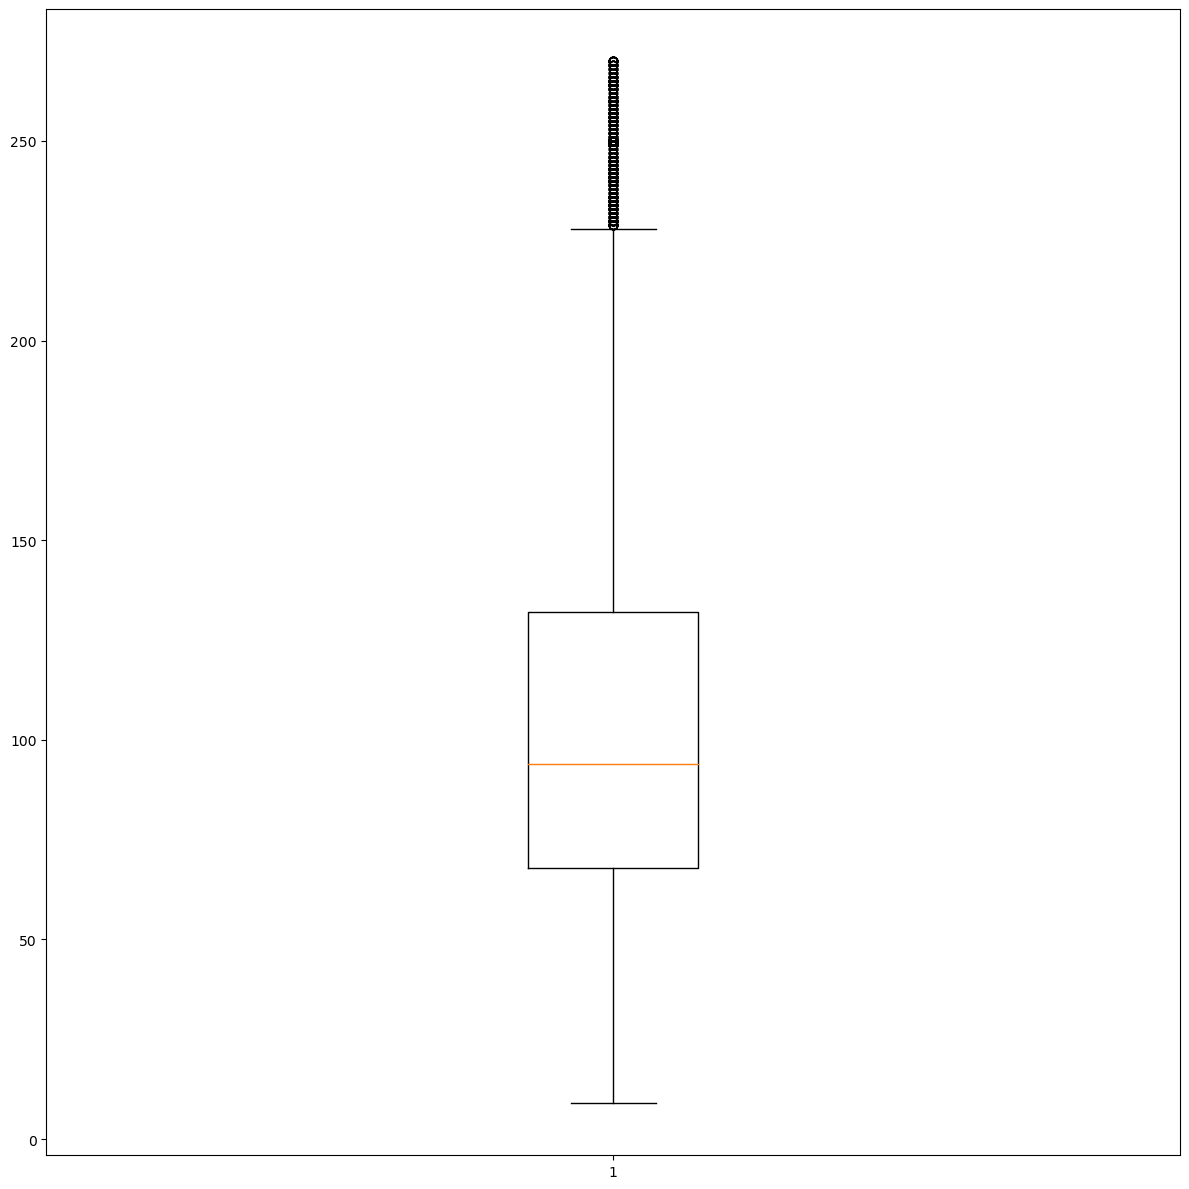

In [33]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_listings['price'])
plt.tight_layout()
plt.show()

In [34]:
df_success = df_listings[(df_listings['n_reviews'] >= 50)&(df_listings['availability_30'] <= 10)]

In [35]:
print(df_success)

             id                                               name  \
1       5625937  Fancy apt in historical building in Duomo Area...   
14       206450                        Porta Romana, it's so Milan   
22     26374075                         The House in the Courtyard   
86      2759420                  luxury apartment in central Milan   
95     24224061   Independent bright studio in the center of Milan   
...         ...                                                ...   
20335   3816798                         Lovely room in Città Studi   
20344  17899097    Grazioso appartamento a 10 min da Linate/Centro   
20348   3725671                        Charming apartment in Brera   
20351  45512683                                         Interno 21   
20369  22007360  Grazioso Monolocale, Fondazione Prada, MM3 Brenta   

                                             description  \
1                                                      T   
14     <b>The space</b><br />A nice apa

In [36]:
df_listings = pd.merge(df_listings, df_success['id'], on='id', how='outer', suffixes=('_listings', '_success'), indicator=True)
df_listings = df_listings[df_listings['_merge'] == 'left_only']
df_listings = df_listings.drop('_merge', axis=1)

In [37]:
meanprice_success = df_success['price'].mean()
stdprice_success = df_success['price'].std()
meanprice_listings = df_listings['price'].mean()
stdprice_listings = df_listings['price'].std()

In [38]:
t, p = stats.ttest_ind_from_stats(mean1=meanprice_success, std1=stdprice_success, nobs1=len(df_success),
                                  mean2=meanprice_listings, std2=stdprice_listings, nobs2=len(df_listings))


In [39]:
if p < 0.05:
    print("La differenza tra le medie dei prezzi è significativa")
else:
    print("La differenza tra le medie dei prezzi non è significativa")

La differenza tra le medie dei prezzi è significativa


In [40]:
meanprice_success

90.94990458015268

In [41]:
meanprice_listings

107.66569837811667

In [42]:
stdprice_success

45.77338462302839

In [43]:
stdprice_listings

53.71942848525747

In [44]:
meanlendes_success = df_success['len_description'].mean()
stdlendes_success = df_success['len_description'].std()
meanlendes_listings = df_listings['len_description'].mean()
stdlendes_listings = df_listings['len_description'].std()

In [45]:
tlen, plen = stats.ttest_ind_from_stats(mean1=meanprice_success, std1=stdprice_success, nobs1=len(df_success),
                                  mean2=meanprice_listings, std2=stdprice_listings, nobs2=len(df_listings))


In [46]:
if plen < 0.05:
    print("La differenza tra le medie della lunghezza delle descrizioni è significativa")
else:
    print("La differenza tra le medie della lunghezza delle descrizioni non è significativa")

La differenza tra le medie della lunghezza delle descrizioni è significativa


In [47]:
meanlendes_success

822.1483778625955

In [48]:
meanlendes_listings

659.8798717017671

In [49]:
stdlendes_success

252.56351251550564

In [50]:
stdlendes_listings

319.63351514953416

In [ ]:
import pandas as pd

In [51]:
all_words = ' '.join(df_success['description'].astype(str).tolist())

In [52]:
all_words

'T <b>The space</b><br />A nice apartment, 80 sqm , fully equipped and fully furnished. It is located on the fourth floor with service elevator in a new building. It consists of one master bedroom with king size bed, a brand new  bathroom, a large living room and walk in modern kitchen with new appliances (oven – dishwasher – washing machine and all kitchen equipments) , two  balconies and Wi-Fi connection.The building is located in a residential area, Porta Romana, very close to the centre and well connected by public transports. (3 stops from Duomo by underground, yellow line).<br /><br />The neighboorhood is very lively with plenty of pizzerie,trattorie,restaurants,bars,(website hidden) the street there are parking spaces reserved for residents, (yellow lines), and others parkings (blue lines, charge). Its central location makes unnecessary the use of car.<br /><br />One last thing: <br />I am happy to accept first-time Airbnb users (it\'s a great service that I really believe in, a

In [53]:
def word_count(df, col_name):
    # Uniamo tutte le parole in una stringa unica
    all_words = ' '.join(df[col_name].astype(str).tolist())
   # Rimuove la punteggiatura e le cifre
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)

    # Converti il testo in una lista di parole
    words = text.split()

    # Conta le ricorrenze di ogni parola
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

In [54]:
word_success_description = word_count(df_success, description)

NameError: name 'description' is not defined